<marquee>Submitted By : Anish Manandhar -3_2 </marquee>

# Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score,confusion_matrix, roc_curve, auc,classification_report
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import  RandomOverSampler
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")
from nltk import FreqDist
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
%matplotlib inline

# Importing data


In [6]:
df = pd.read_csv('/kaggle/input/trip-advisor-hotel-reviews/tripadvisor_hotel_reviews.csv')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


# Sample of the dataset

In [7]:
df_sample = df.sample(frac = 1, replace = False, random_state=42)
df_sample.head()

,Review,Rating
10726,not recommend hotel did reviewers actually sta...,1
14919,"barcelona rocks, stayed hotel jazz girlfriend ...",4
19098,ok hotel good location stayed night way beijin...,3
2450,great service nice pool ok beach lovely ground...,4
960,surprising treat spent weekend july 15/16 2006...,5


In [8]:
df_sample['Rating'].value_counts()

Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64

In [9]:
df_sample.shape

(20491, 2)

# Data Preprocessing

In [10]:
df_sample['Rating'] = df_sample['Rating'].apply(lambda x: 1 if x == 5 else (-1 if x == 1 else 0))
df_sample['Sentiment_Supervised'] = df_sample['Rating'].apply(lambda x: 'Positive' if x == 1 else ('Negative' if x == 1 else 'Neutral'))

df_sample.tail(10)

,Review,Rating,Sentiment_Supervised
11363,convenient cruise docks looking place stay nig...,0,Neutral
14423,excellent service great location stayed hotel ...,0,Neutral
4426,"great hotel garden view room, stayed hotel ear...",1,Positive
16850,qulaity hotel n't listen naysayers hotel quali...,1,Positive
6265,desk representative desk representative alliso...,1,Positive
11284,"worth money no complaints place beautiful, sta...",0,Neutral
11964,stellar experience stayed night pleasantly sur...,1,Positive
5390,"best location town aquarium, soon enter hotel ...",1,Positive
860,"amazing place amazing location amazing food, p...",1,Positive
15795,"loved want, hotel fantastic, stayed season hot...",1,Positive


In [11]:
df_sample['Rating'].value_counts()

Rating
 0    10016
 1     9054
-1     1421
Name: count, dtype: int64

# Data Visualization

In [12]:
fig =  px.histogram(df, x="Rating", color="Rating",
                   title="Hotel Rating Count")
fig.show()

The bar graph shows how the distribution of the data and shows most of the reviews are positive, relating tothe observation to what's commonly known as the "Pareto Principle"
When applied to this data distribution, it often means that a large majority (around 80%) of outcomes stem from a minority (around 20%) of inputs. In the context of reviews, this could imply that a significant portion of reviews (perhaps around 80%) are positive, while a smaller percentage (around 20%) might be negative or neutral. This is a data imbalance. 
It's important to experiment with different strategies and combinations thereof to find the most effective approach for your specific dataset and machine learning task. Additionally,the potential implications of balancing techniques on the overall performance and generalization ability of the models need to be tested upon.

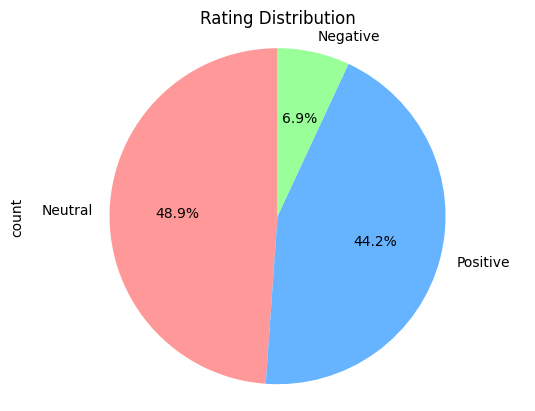

In [13]:
# Plot the pie chart
rating_counts = df_sample['Rating'].value_counts()
rating_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=['Neutral', 'Positive', 'Negative'], colors=['#ff9999','#66b3ff','#99ff99'])

# Add title
plt.title('Rating Distribution')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()

This pie chart depicts the distribution of ratings across three categories: Neutral, Positive, and Negative. The majority of ratings fall into the Neutral category(2,3,4), accounting for 48.9% of the total. Positive ratings make up 44.2%,(5) while Negative ratings are the smallest portion at 6.9%. This suggests that nearly half of the feedback is neutral, with a slightly lower proportion being positive, and a small fraction being negative. Overall, there is a predominance of neutral and positive feedback compared to negative feedback. People seems to be more inclined in giving neutral reviews combined.

In [61]:
vis_df = df.copy()
vis_df['Length'] = vis_df['Review'].apply(len)
vis_df.head()

,Review,Rating,Length
0,nice hotel expensive parking got good deal sta...,4,593
1,ok nothing special charge diamond member hilto...,2,1689
2,nice rooms not 4* experience hotel monaco seat...,3,1427
3,"unique, great stay, wonderful time hotel monac...",5,600
4,"great stay great stay, went seahawk game aweso...",5,1281


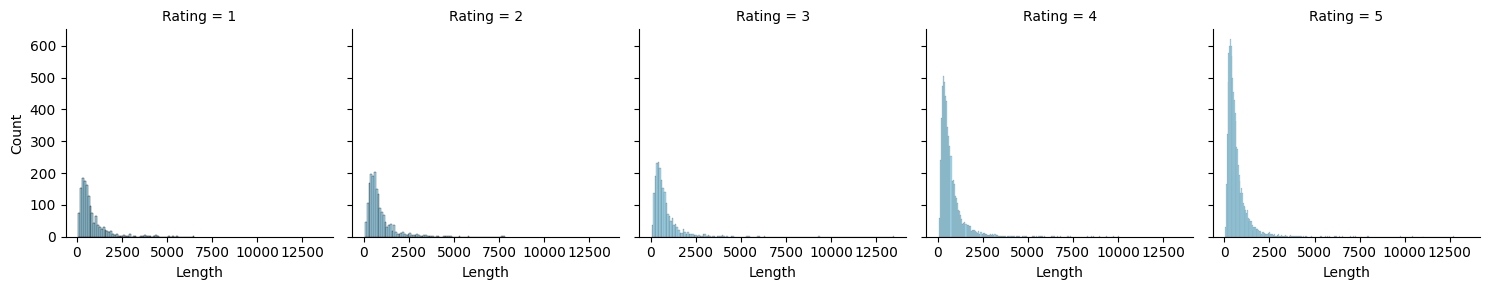

In [ ]:
g = sns.FacetGrid(data=vis_df, col='Rating')
g.map(sns.histplot, 'Length', color='skyblue') 

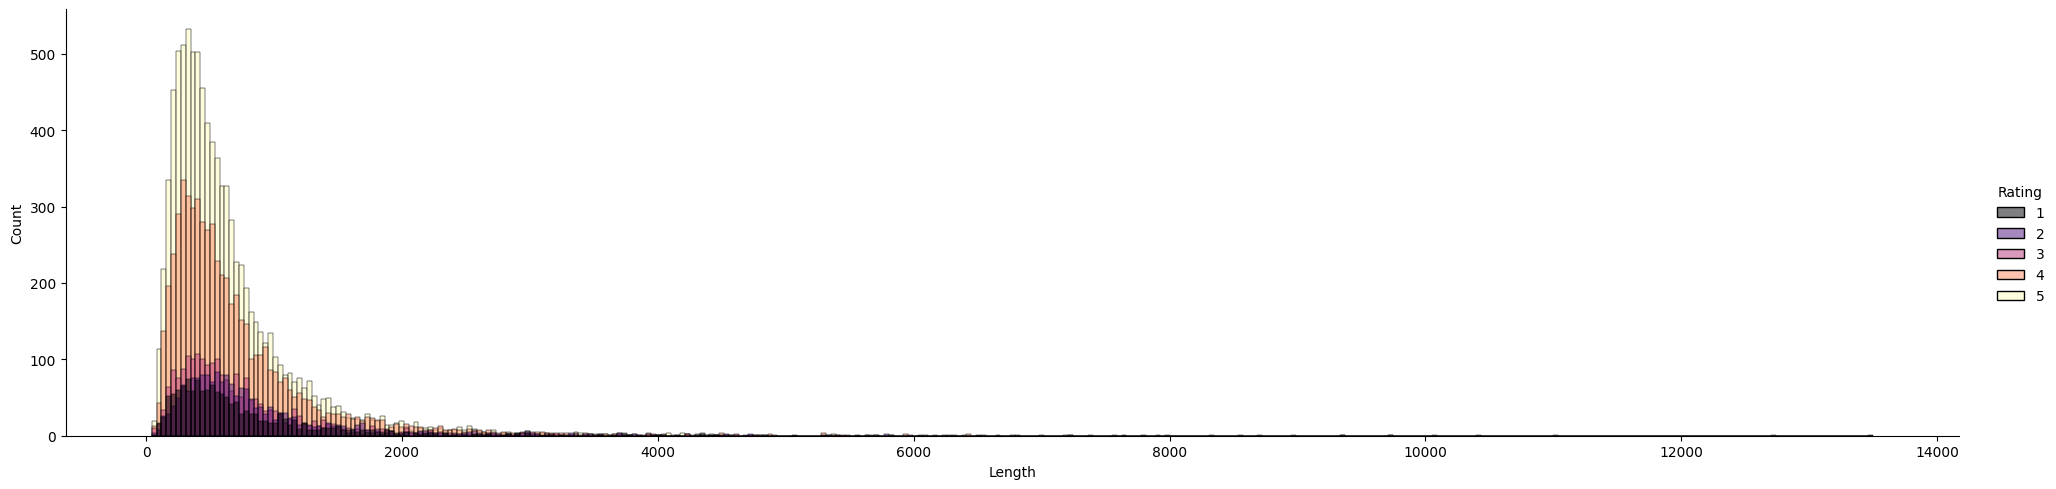

In [ ]:
sns.displot(data=vis_df, x='Length', hue='Rating', palette='magma', kind='hist', fill=True, aspect=4)


This set of histograms shows the distribution of text lengths (presumably in characters or words) for different rating levels, ranging from 1 to 5. Here's what can be observed from each subplot:

Rating = 1: The majority of text lengths are clustered around shorter lengths, with a sharp decline as the length increases. There are a few instances of much longer texts, but they are very rare. 

Rating = 2: Similar to Rating 1, most texts are short. The distribution is slightly more spread out but still shows a steep drop-off as the length increases.

Rating = 3: Again, the texts are predominantly short, with a small number of longer texts. The distribution pattern is consistent with the previous ratings, having a rapid decline in frequency as the text length increases.

*This signifies that people delivering poor feedback are less likely to write shorter words*

Rating = 4: Text lengths here also peak at shorter lengths and decrease as the length grows. However, compared to the previous ratings, there is a marginally higher occurrence of longer texts, though still relatively rare.

Rating = 5: The pattern remains similar, with most texts being short. This histogram shows a slightly higher peak at the short lengths compared to the other ratings and a rapid drop-off as the length increases.

*This signifies that people delivering positive feedback are less likely to write longer words*

-Overall, across all ratings, most texts are short, with longer texts being much less common. The shape of the distribution is similar for each rating, showing a high concentration of short texts and a few longer ones. The primary difference among the ratings is the slight variations in the peak counts and spread of the text lengths.

-One possible explanation could be that when people are delivering negative feedback, they might be more inclined to use more complex or elaborate language to articulate their thoughts. This could be because they feel the need to justify or explain their criticism in more detail, or perhaps they want to appear more authoritative or knowledgeable.

However, it's important to note that this observation might not hold true in all cases, as language use can be influenced by various factors including individual communication styles, cultural norms, and the specific context of the feedback exchange.

If you're interested in exploring this further, you could conduct some research or experiments to investigate patterns in language use during feedback interactions.

<Axes: xlabel='Rating', ylabel='Length'>

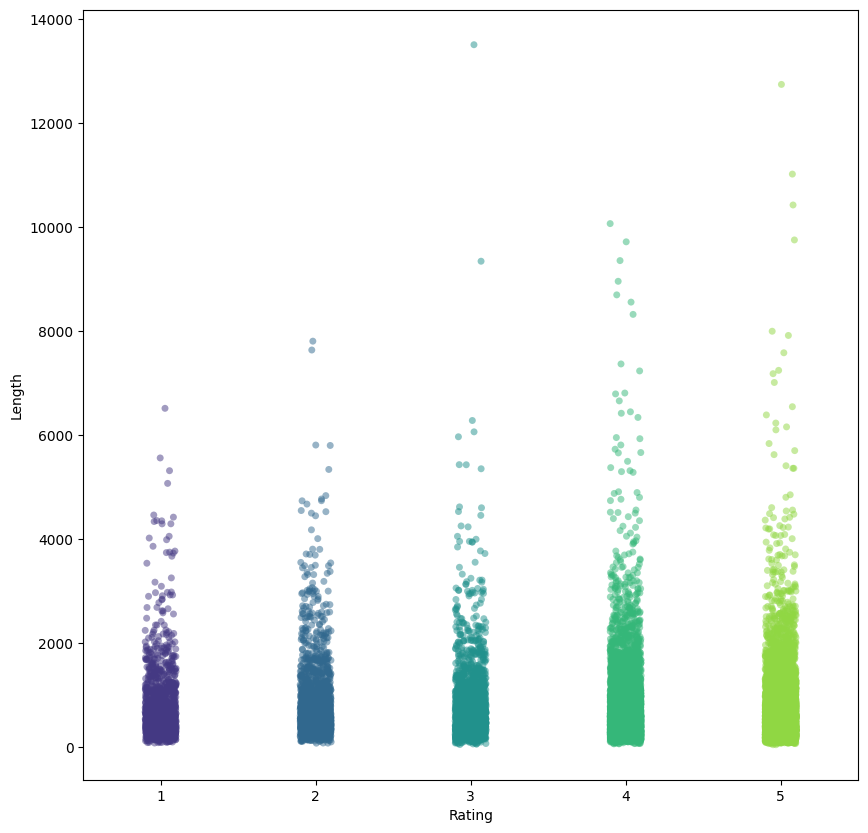

In [ ]:
sns.stripplot(data=vis_df, x='Rating', y='Length', palette='viridis', alpha=0.5, marker='o')

This strip plot visualizes the relationship between text length and rating, with the text length on the y-axis and the ratings from 1 to 5 on the x-axis.
General Trend: Most text lengths are concentrated below 2000 characters across all ratings. There are a few outliers with much longer lengths, but they are relatively rare.

Rating Distribution:

Rating 1: Texts with this rating tend to be shorter, with a high concentration around 0-2000 characters. There are some outliers reaching up to 6000-8000 characters, and one extreme outlier near 14,000 characters.
Rating 2: The distribution is similar to Rating 1, with most texts under 2000 characters. Outliers are present but are fewer compared to Rating 1, with the longest text being around 8000 characters.
Rating 3: Text lengths here show a similar pattern, with the majority being short (0-2000 characters). Some outliers extend up to 8000 characters.
Rating 4: There is a slightly broader spread of text lengths in this category, although the concentration is still around 0-2000 characters. The outliers extend further compared to lower ratings, with a few texts reaching up to 10,000 characters.
Rating 5: This category shows the widest spread of text lengths. While most texts remain under 2000 characters, there are several outliers extending up to 12,000 characters.
Overall Pattern: The plot suggests that while the majority of texts for all ratings are relatively short, higher ratings (4 and 5) tend to have a wider range of text lengths, including some significantly longer texts. This might indicate that more detailed reviews are often associated with higher ratings.

Outliers: Each rating has some outliers with very high text lengths, but they are few and become more prominent in higher ratings.

This scatter plot highlights the predominance of shorter texts across all ratings, with occasional longer reviews becoming more frequent as the rating increases.

In [ ]:

def freq_words(x, terms=35):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word': list(fdist.keys()), 'count': list(fdist.values())})

    # selecting top 35 most frequent words
    d = words_df.nlargest(columns="count", n=terms)

    # Plot histogram using Plotly
    fig = px.bar(d, x="count", y="word", title="35 Most Frequent Words", 
                 orientation='h', labels={'count':'Count', 'word':'Word'},
                 color='count', color_continuous_scale='RdBu')
    fig.update_traces(marker_line_width=0)
    fig.update_layout(yaxis_categoryorder='total ascending')
    fig.show()

# Example usage
freq_words(vis_df['Review'])


The frequency distribution shows the frequency of the 35 most frequent words and thier counts. A bar chart is typically used to visualize this frequency distribution, with words and their counts on the y-axis making it easy to see which words are most common and their relative frequencies. 
The most common words that are important for our project are:
- nice
- location 
- small
- walk
- clean
- pool
- resort
- breakfast
- food

# WordCloud

In [15]:
def wordcloudGenerator(Sentiment):
    plt.rcParams['figure.figsize'] = (10, 10)
    plt.style.use('fast')

    wc = WordCloud(background_color = 'white', width = 1500, height = 1500).generate(str(Sentiment['Review']))
    plt.title('Description of most frequent positive comment words', fontsize = 15)

    plt.imshow(wc)
    plt.axis('off')
    plt.show()

In [ ]:
Positive = df_sample[df_sample['Sentiment_Supervised'] == 'Positive']
Negative = df_sample[df_sample['Sentiment_Supervised'] == 'Negative']
Neutral = df_sample[df_sample['Sentiment_Supervised'] == 'Neutral']

A word cloud is a visual representation of text data, where the size of each word indicates its frequency or importance. The largest words in the word cloud are the most frequently occurring ones. These words stand out prominently and provide immediate insights into the main topics or themes of the text. By observing the prominent words, we can infer common themes or sentiments.Positive neutral or negative sentiments can often be gauged by the types of words that appear most frequently.

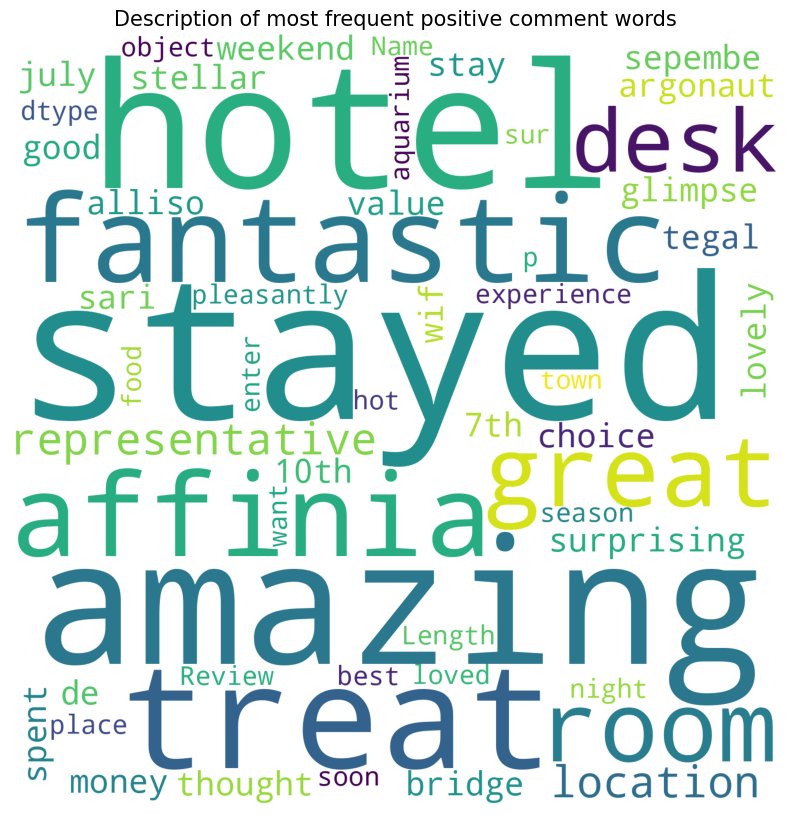

In [16]:
wordcloudGenerator(Positive)

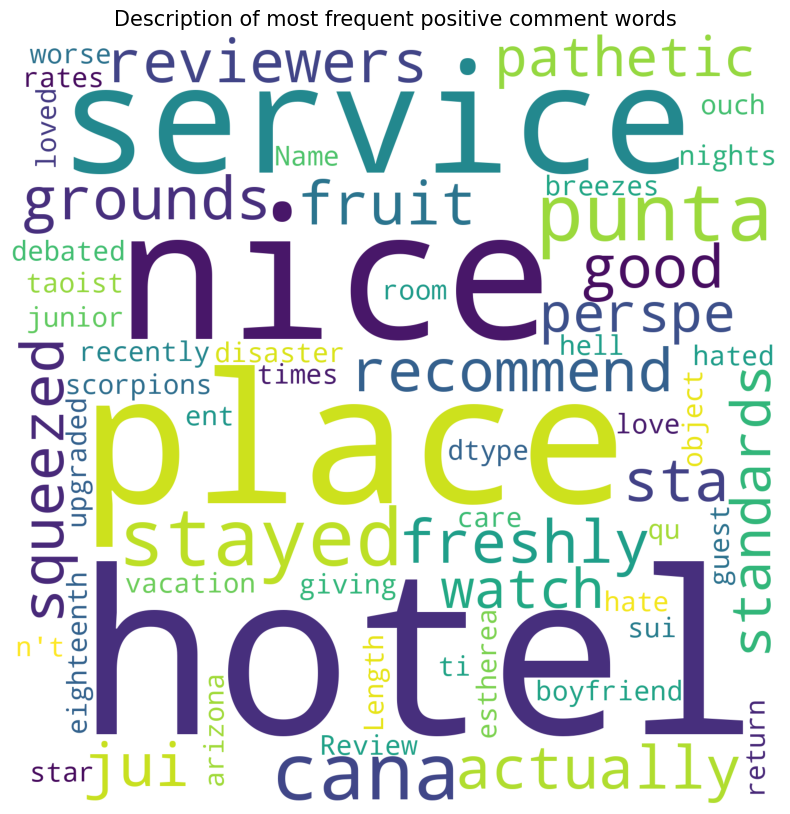

In [17]:
wordcloudGenerator(Negative)

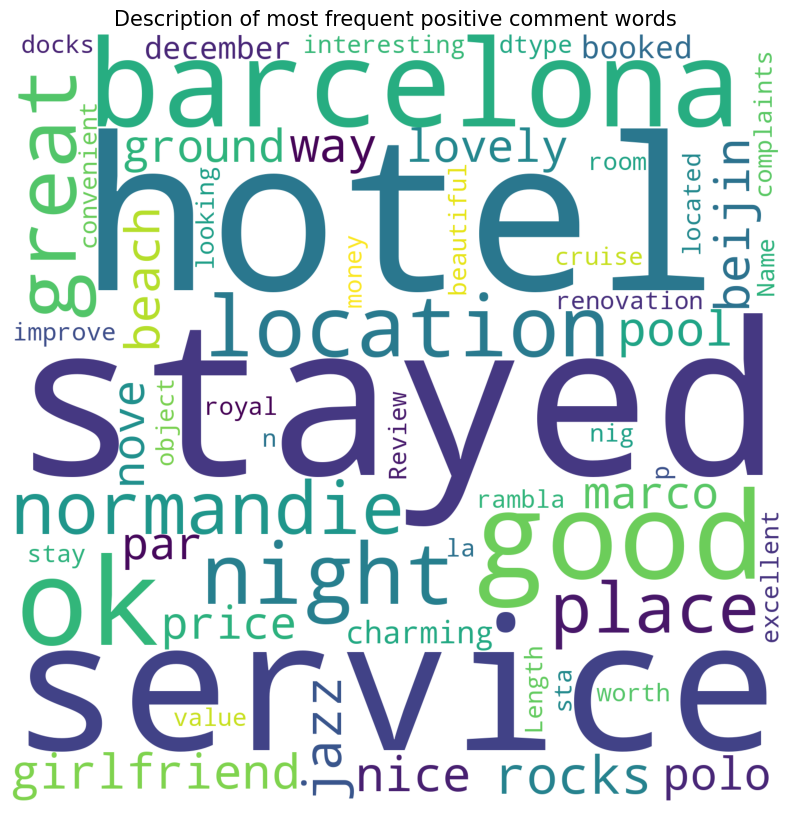

In [18]:
wordcloudGenerator(Neutral)

 Words like "great," "love," and "easy" suggest positive sentiments, while words like "bad," "problem," and "return" suggest negative sentiments. Word clouds are not only functional but also visually appealing, making them a popular choice for presenting text data insights in reports and presentations.

# Splitting of the DataSet

In [19]:
X = df_sample.Review
y = df_sample.Rating

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [20]:
X_train,y_train

(19836    great base visit enjoy london, great hotel exc...
 2699     copa marina expected, husband just returned ho...
 12173    nice room not good service rooms hotel nice bo...
 17347    restaurant plato coral sea hotel bad experienc...
 7203     split personality hotel decor transition feb 1...
                                ...                        
 20440    sweeping city views great new hotel san franci...
 14379    excellent value centrally located hotel stayed...
 16743    modern clean quality acevi villarroel west old...
 18556    just returned majestic just returned somewhat ...
 16740    flawless stay booking having relied previous r...
 Name: Review, Length: 16392, dtype: object,
 19836    1
 2699     0
 12173    0
 17347   -1
 7203     0
         ..
 20440    1
 14379    1
 16743    0
 18556    0
 16740    0
 Name: Rating, Length: 16392, dtype: int64)

# Model

In [21]:
tvec = TfidfVectorizer()
lr = LogisticRegression()
xgbc = xgb.XGBClassifier()
cbc = CatBoostClassifier()
mlp = MLPClassifier(hidden_layer_sizes=(8), max_iter=42, activation = 'relu', solver='adam')

In [25]:
# Convert text data to numerical data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Logistic Regression model
model_lr = LogisticRegression()
model_lr.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_lr = model_lr.predict(X_test_tfidf)

# Print the classification report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

          -1       0.80      0.52      0.63       284
           0       0.73      0.77      0.75      2007
           1       0.76      0.76      0.76      1808

    accuracy                           0.75      4099
   macro avg       0.76      0.68      0.71      4099
weighted avg       0.75      0.75      0.75      4099



In [26]:
print(accuracy_score(y_test,y_pred_lr))

0.7482312759209563


True Positive Rate (TPR): Also known as recall or sensitivity, it measures the proportion of actual positives that are correctly identified as such. It is defined as:

$ TPR =  \frac{TP}{TP+FN}$
​


 
where 

TP is the number of true positives, and 

FN is the number of false negatives.

False Positive Rate (FPR): It measures the proportion of actual negatives that are incorrectly identified as positives. It is defined as:
$ FPR =  \frac{FP}{FP+TN}$

The ROC curve plots TPR against FPR at various threshold settings. Each point on the ROC curve represents a TPR/FPR pair corresponding to a particular decision threshold.

2. AUC (Area Under the Curve):
AUC Value: The AUC value ranges from 0 to 1. An AUC of 0.5 suggests no discriminative power, which is equivalent to random guessing. An AUC closer to 1 indicates a better performance.
AUC = 0.5: No discrimination (random classifier).
- 0.5 < AUC < 0.7: Poor performance.
- 0.7 ≤ AUC < 0.8: Fair performance.
- 0.8 ≤ AUC < 0.9: Good performance.
- 0.9 ≤ AUC < 1: Excellent performance

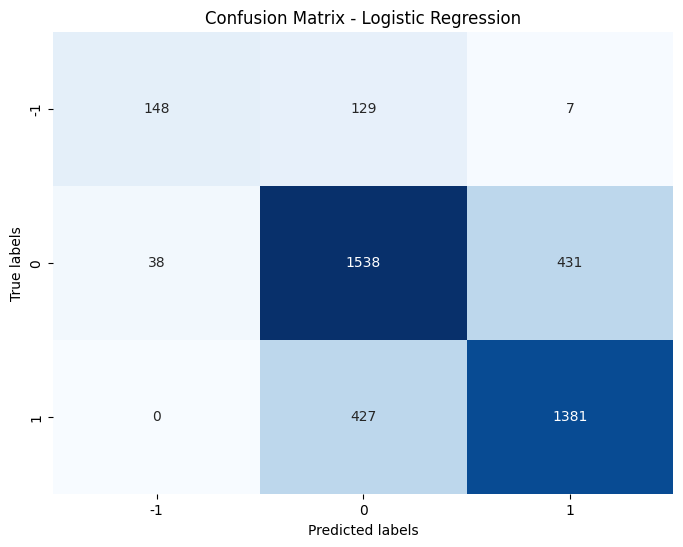

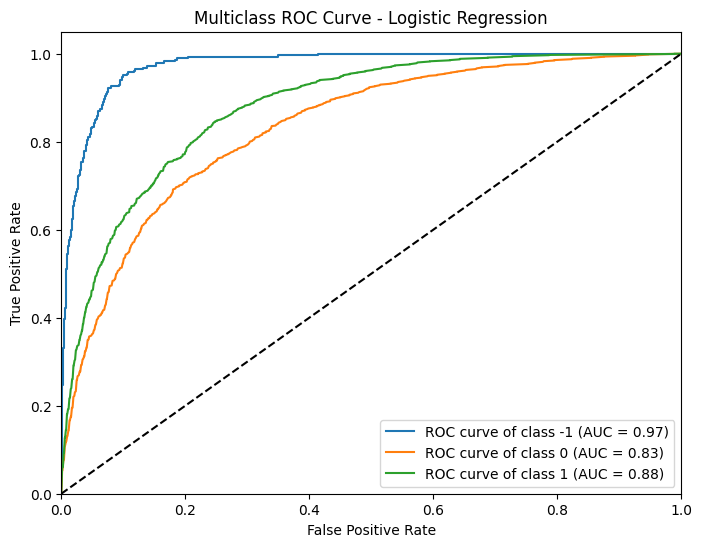

In [43]:

def plot_confusion_matrix(cm, classes,title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False, xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {title}')
    plt.show()

def plot_multiclass_roc_curve(y_test, y_pred_proba, classes,title):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test_bin = lb.transform(y_test)
    
    plt.figure(figsize=(8, 6))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    for i, label in enumerate(classes):
        plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {label} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Multiclass ROC Curve - {title}')
    plt.legend(loc='lower right')
    plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
plot_confusion_matrix(cm, np.unique(y_test),'Logistic Regression')

# Multiclass ROC Curve
plot_multiclass_roc_curve(y_test, model_lr.predict_proba(X_test_tfidf), model_lr.classes_,'Logistic Regression')


In [31]:
# Predict with a new example
example = ['The room was fine']

# Transform the example using the same vectorizer as used during training
example_tfidf = vectorizer.transform(example)

# Predict the rating for the example review
example_pred = model_lr.predict(example_tfidf)

print(f"Prediction for the example review: {example_pred[0]}")

Prediction for the example review: 0


In [34]:
# Convert text data to numerical data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a CatBoostClassifier model
model_cat = CatBoostClassifier(iterations=100, verbose=0)  
model_cat.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_cat = model_cat.predict(X_test_tfidf)

# Print the classification report
print(classification_report(y_test, y_pred_cat))

# Predict with a new example
example = ['The room was really bad']

# Transform the example using the same vectorizer as used during training
example_tfidf = vectorizer.transform(example)

# Predict the rating for the example review
example_pred = model_cat.predict(example_tfidf)

print(f"Prediction for the example review: {example_pred[0]}")

              precision    recall  f1-score   support

          -1       0.70      0.51      0.59       284
           0       0.72      0.75      0.74      2007
           1       0.75      0.75      0.75      1808

    accuracy                           0.73      4099
   macro avg       0.72      0.67      0.69      4099
weighted avg       0.73      0.73      0.73      4099

Prediction for the example review: [0]


Accuracy signifies overall how often is the classifier correct

$ Accuracy = \frac{\sum TP}{\sum Total Instance} $
- Precision signifies , how many of the predicted instances were correct
$ Precision = \frac{TP}{TP + FP} $
- Recall signigies how many actual instances were correctly predicted
$ Recall = \frac{TP}{TP + FN} $
- F1 Score is the harmonic mean of the precision and recall.

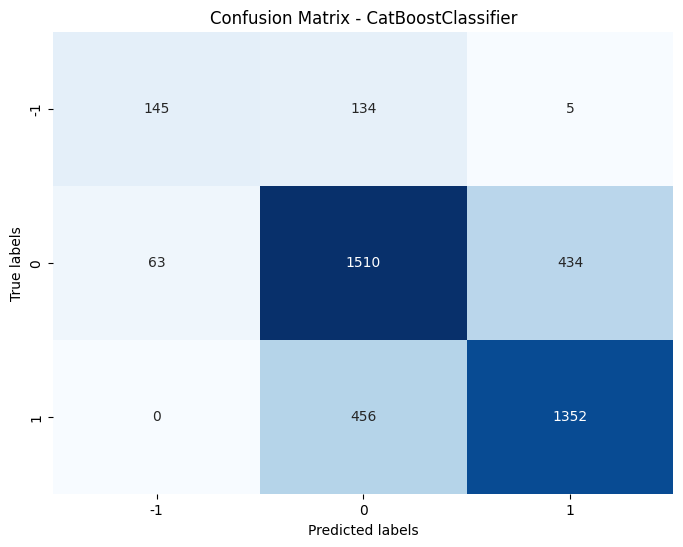

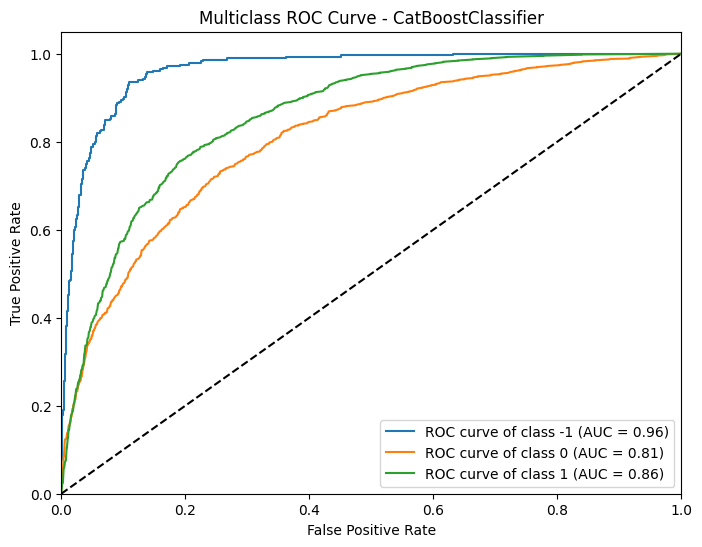

In [45]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_cat)
plot_confusion_matrix(cm, np.unique(y_test),'CatBoostClassifier')

# Multiclass ROC Curve
plot_multiclass_roc_curve(y_test, model_cat.predict_proba(X_test_tfidf), model_cat.classes_,'CatBoostClassifier')


A confusion matrix is a powerful tool for evaluating the performance of a classification model, especially in the context of multiclass classification. It provides a detailed breakdown of the correct and incorrect predictions made by the model.

In [47]:
model_mlp = Pipeline(steps=[('victorizer', tvec),("ROS", RandomOverSampler()), ('classifier', mlp)])

model_mlp.fit(X_train,y_train)

y_pred_model_mlp = model_mlp.predict(X_test)

print(accuracy_score(y_test,y_pred_model_mlp))
print('\n')
print(classification_report(y_test,y_pred_model_mlp))

0.700414735301293


              precision    recall  f1-score   support

          -1       0.62      0.62      0.62       284
           0       0.70      0.69      0.70      2007
           1       0.71      0.72      0.72      1808

    accuracy                           0.70      4099
   macro avg       0.68      0.68      0.68      4099
weighted avg       0.70      0.70      0.70      4099



A ROC curve for multiclass classification involves handling multiple classes, by converting the problem into multiple binary classification problems. Each curve in ROC shows the trade-off between the True Positive Rate (TPR) and False Positive Rate (FPR) for each class. The area under each ROC curve indicates the model’s ability to distinguish between the positive class,neutral class and the negative classes. A higher AUC represents better performance and has shown to be efficient with negative class


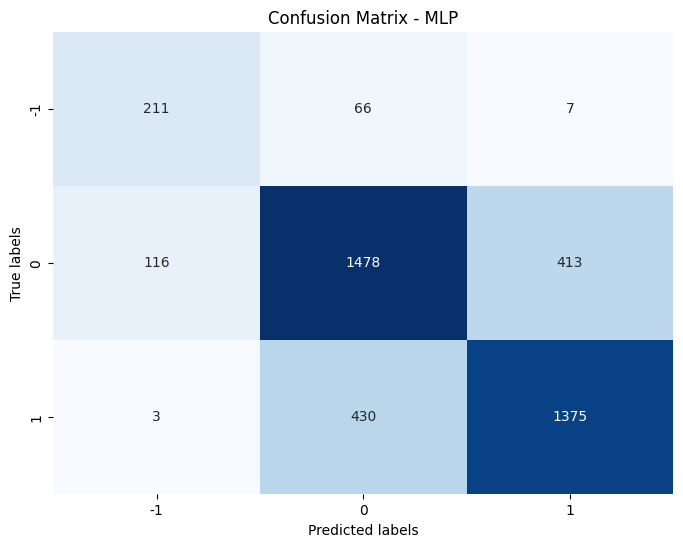

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_model_mlp)
plot_confusion_matrix(cm, np.unique(y_test),'MLP')



# Exporting the model for Deployment

In [50]:
joblib.dump(model_mlp, 'model.pkl')

['model.pkl']